In [39]:
import pandas as pd
import plotly.express as px
from textblob import TextBlob

In [41]:
dff = pd.read_csv('netflixanalysis/netflix_titles.csv')
dff.shape

(8807, 12)

In [43]:
dff.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

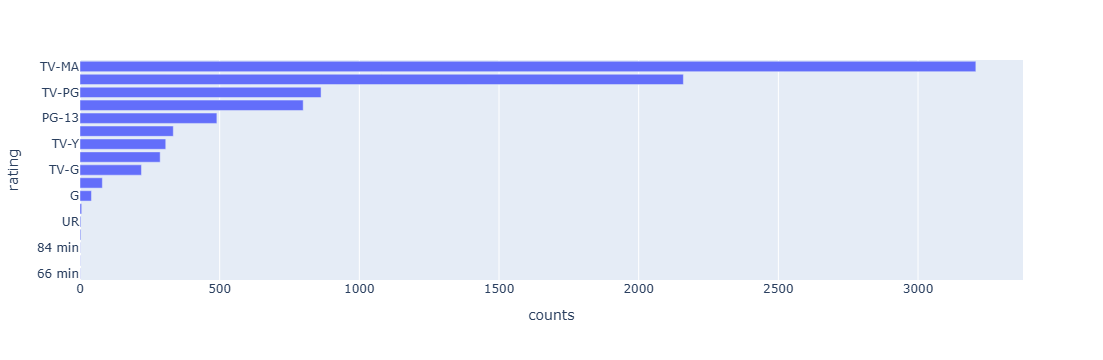

In [45]:
z = dff.groupby(['rating']).size().reset_index(name='counts')
dados_ordenados = z.sort_values(by='counts', ascending=True)
barras = px.bar(dados_ordenados, x='counts', y='rating')
barras.show()

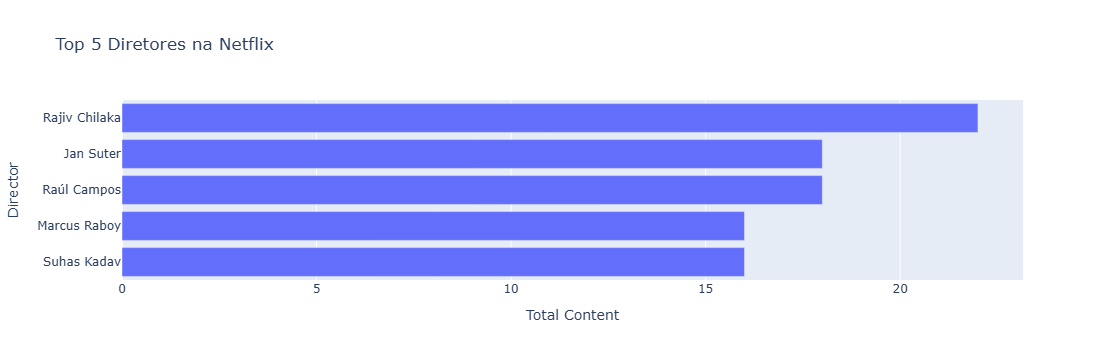

In [47]:
dff['director']= dff['director'].fillna('No Director Specified') #Trocando os dados vazios da coluna
filtered_directors = pd.DataFrame() 
filtered_directors = dff['director'].str.split(',', expand=True).stack()
filtered_directors = filtered_directors.to_frame()
filtered_directors.columns= ['Director']
directors = filtered_directors.groupby(['Director']).size().reset_index(name = 'Total Content')
directors = directors[directors.Director != 'No Director Specified']
directors = directors.sort_values(by = ['Total Content'], ascending = False)
directorsTop5 = directors.head()
directorsTop5 = directorsTop5.sort_values(by = ['Total Content'])
fig1 = px.bar(directorsTop5, x='Total Content', y='Director', title= 'Top 5 Diretores na Netflix')
fig1.show()

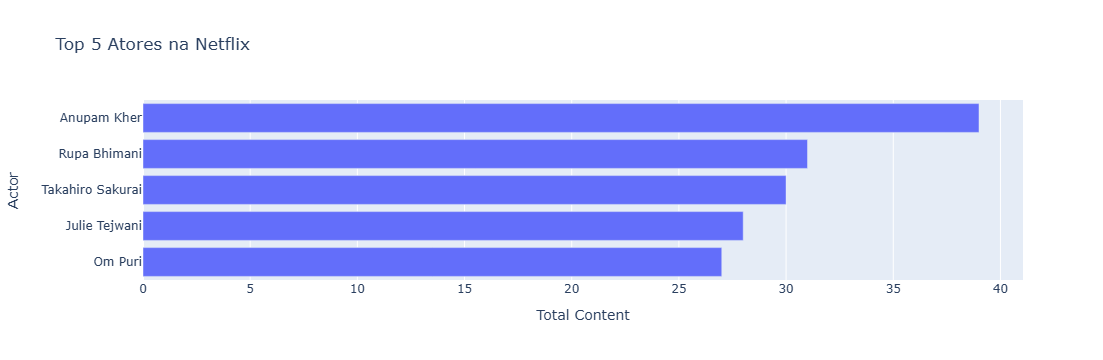

In [49]:
dff['cast']=dff['cast'].fillna('No Cast Specified')
filtered_cast=pd.DataFrame()
filtered_cast=dff['cast'].str.split(',',expand=True).stack()
filtered_cast=filtered_cast.to_frame()
filtered_cast.columns=['Actor']
actors=filtered_cast.groupby(['Actor']).size().reset_index(name='Total Content')
actors=actors[actors.Actor !='No Cast Specified']
actors=actors.sort_values(by=['Total Content'],ascending=False)
actorsTop5=actors.head()
actorsTop5=actorsTop5.sort_values(by=['Total Content'])
fig2=px.bar(actorsTop5,x='Total Content',y='Actor', title='Top 5 Atores na Netflix')
fig2.show()

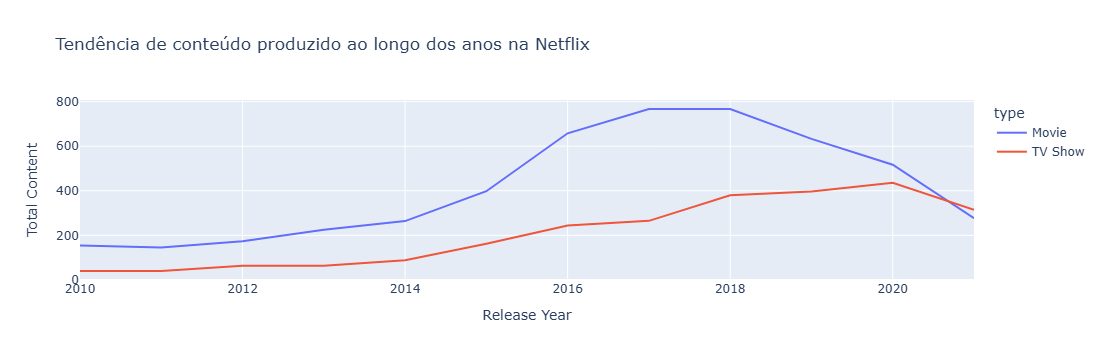

In [51]:
df1=dff[['type','release_year']]
df1=df1.rename(columns={"release_year": "Release Year"})
df2=df1.groupby(['Release Year','type']).size().reset_index(name='Total Content')
df2=df2[df2['Release Year']>=2010]
fig3 = px.line(df2, x="Release Year", y="Total Content", color='type',title='Tendência de conteúdo produzido ao longo dos anos na Netflix')
fig3.show()